### Code Along 5 mars 2024, Lesson 7
- GridSearchCV: performs hyperparameteroptimization even on estimators that don't have a *CV version

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
# wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Pipeline
- Set up a pipeline for execution inside gridsearchCV object.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()

pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipe_log = make_pipeline(scaler, LogisticRegression(penalty='elasticnet', solver="saga", max_iter=10000))

pipe_forest = Pipeline ([("forest", RandomForestClassifier())])

params_knn = {'knn__n_neighbors' : list(range(1,50))}
params_log = {'logistigregression__l1_ratio' : np.linspace(0,1,20)}
params_forest = {'forest__n_estimators' : list(range(50, 200, 10))}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=params_knn, cv=5, scoring="accuracy")
classifier_log = GridSearchCV(estimator=pipe_log, param_grid=params_log, cv=5, scoring="accuracy")
classifier_forest = GridSearchCV(estimator=pipe_forest, param_grid=params_forest, cv=5, scoring="accuracy")

In [30]:
classifier_KNN.fit(X_train, y_train)
#classifier_log.fit(X_train, y_train)
classifier_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestClassifier())]),
             param_grid={'forest__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180, 190]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



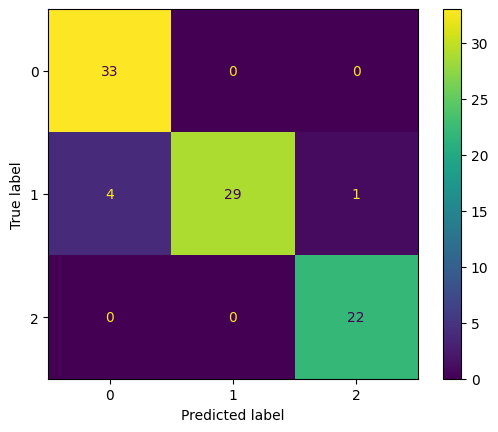

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_knn = classifier_KNN.predict(X_test)

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot()

In [24]:
y_pred_log = classifier_log.predict(X_test)

print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm).plot()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        34
           2       1.00      1.00      1.00        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



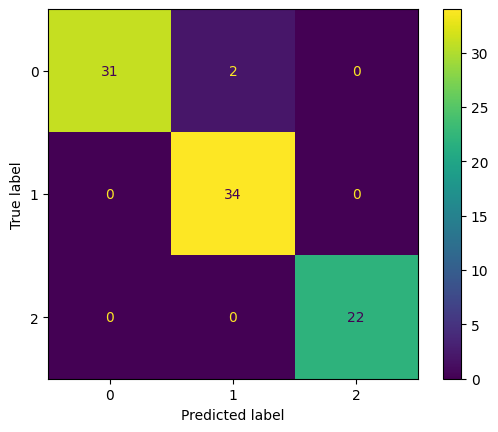

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_forest = classifier_forest.predict(X_test)

print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()

Man kan spara sin tränade modell med joblib.dump. Den kan sedan läsas in enkelt.

In [33]:
import joblib
joblib.dump(classifier_KNN, '05_production_model.joblib')

my_model = joblib.load('05_production_model.joblib')

my_model.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

In [36]:
import pickle
pickle.dump(classifier_KNN, '05_production_model.pickle')

my_model = pickle.load('05_production_model_pickle.pickle')

my_model.predict(X_test)

TypeError: file must have a 'write' attribute